# Task 1.1

Take a 100X100 grid. You will need to simulate the movement of a cell (like the grey cell in the figure above). You will need to run the algorithm for a 100 steps, and plot the movement of the cell.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate movement of cell
def move_cell(steps):
    # Initialize starting position of the cell
    x, y = 50, 50
    movements = []

    # Run the algorithm for specified number of steps
    for _ in range(steps):
        # Generate random numbers (0 or 1) using uniform distribution
        rand1 = np.random.uniform(0, 1)
        rand2 = np.random.uniform(0, 1)

        # Update cell position based on random numbers
        if rand1 <= 0.5 and rand2 <= 0.5:
            y += 1  # Move up
        elif rand1 <= 0.5 and rand2 > 0.5:
            y -= 1  # Move down
        elif rand1 > 0.5 and rand2 <= 0.5:
            x -= 1  # Move left
        elif rand1 > 0.5 and rand2 > 0.5:
            x += 1  # Move right
        
        # Append current position to list of movements
        movements.append((x, y))

    return movements

# Simulate cell movement for 100 steps
movements = move_cell(100)

# Extract x and y coordinates for plotting
x_coords, y_coords = zip(*movements)

# Plot cell movement
plt.figure(figsize=(8, 8))
plt.plot(x_coords, y_coords, marker='o', markersize=5, linestyle='-')
plt.title('Movement of Cell (100 Steps)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()


# Task 1.2

Instead of the four possible directions of movement you can have eight. Here movement along the diagnocals is also possible.

In [ ]:
# Function to simulate movement of cell
def move_cell(steps):
    # Initialize starting position of the cell
    x, y = 50, 50
    movements = []

    # Run the algorithm for specified number of steps
    for _ in range(steps):
        # Generate random integers from -1 to 1 for both x-axis and y-axis movement
        rand_x = np.random.randint(-1, 2)
        rand_y = np.random.randint(-1, 2)

        # Update cell position based on random numbers
        x += rand_x
        y += rand_y

        # Append current position to list of movements
        movements.append((x, y))

    return movements

# Simulate cell movement for 100 steps
movements = move_cell(100)

# Extract x and y coordinates for plotting
x_coords, y_coords = zip(*movements)

# Plot cell movement
plt.figure(figsize=(8, 8))
plt.plot(x_coords, y_coords, marker='o', markersize=5, linestyle='-')
plt.title('Movement of Cell (100 Steps)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()

Repeat the above for 100 and 100 steps. Locate the common points in the traversal of the cell. Comment on the movements made

In [ ]:
# Function to simulate movement of cell
def move_cell(steps):
    # Initialize starting position of the cell
    x, y = 50, 50
    movements = []

    # Run the algorithm for specified number of steps
    for _ in range(steps):
        # Generate random integers from -1 to 1 for both x-axis and y-axis movement
        rand_x = np.random.randint(-1, 2)
        rand_y = np.random.randint(-1, 2)

        # Update cell position based on random numbers
        x += rand_x
        y += rand_y

        # Append current position to list of movements
        movements.append((x, y))

    return movements

# Simulate cell movement for two sets of 100 steps
movements_100_1 = move_cell(100)
movements_100_2 = move_cell(100)

# Convert lists of movements to sets of coordinates for easier comparison
set_100_1 = set(movements_100_1)
set_100_2 = set(movements_100_2)

# Find common points in the traversal of the cell
common_points = set_100_1.intersection(set_100_2)

# Plot cell movement for 100 steps (first set)
x_coords_100_1, y_coords_100_1 = zip(*movements_100_1)
plt.figure(figsize=(8, 8))
plt.plot(x_coords_100_1, y_coords_100_1, marker='o', markersize=5, linestyle='-', label='100 Steps (1st set)')

# Plot cell movement for 100 steps (second set)
x_coords_100_2, y_coords_100_2 = zip(*movements_100_2)
plt.plot(x_coords_100_2, y_coords_100_2, marker='o', markersize=5, linestyle='-', label='100 Steps (2nd set)')

# Plot common points
if common_points:
    x_common, y_common = zip(*common_points)
    plt.scatter(x_common, y_common, color='red', marker='o', label='Common Points')

plt.title('Movement of Cell (Two Sets of 100 Steps)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.show()

# Comment on the movements made
if common_points:
    print("Common points in the traversal of the cell:")
    for point in common_points:
        print(point)
else:
    print("No common points found.")

# Part II

## Task 2.1

Simulate the growth of tumour cells for t=1200. Does the growth reach a steady state? If it has not, then experiment with the final time and determine the Time required to reach a steady state.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation for tumor growth
def tumor_growth(N, t, k, M):
    return k * N * np.log(M / N)

# Parameters
k = 0.006  # growth rate
M = 1e13   # capacity
N0 = 1e9   # initial number of cells

# Time points
t_final_1200 = 1200
t_final_3000 = 3000
dt = 0.1  # Time step size
num_steps_1200 = int(t_final_1200 / dt) + 1
num_steps_3000 = int(t_final_3000 / dt) + 1
t_1200 = np.linspace(0, t_final_1200, num_steps_1200)
t_3000 = np.linspace(0, t_final_3000, num_steps_3000)

# Solve the differential equation using Euler's method for each final time
N_1200 = np.zeros(num_steps_1200)
N_3000 = np.zeros(num_steps_3000)
N_1200[0] = N0
N_3000[0] = N0
for i in range(1, num_steps_1200):
    if t_1200[i] <= t_final_1200:
        N_1200[i] = N_1200[i-1] + dt * tumor_growth(N_1200[i-1], t_1200[i-1], k, M)
    else:
        N_1200[i] = N_1200[i-1]
for i in range(1, num_steps_3000):
    if t_3000[i] <= t_final_3000:
        N_3000[i] = N_3000[i-1] + dt * tumor_growth(N_3000[i-1], t_3000[i-1], k, M)
    else:
        N_3000[i] = N_3000[i-1]

# Plot the growth of tumor cells
plt.figure(figsize=(10, 6))

plt.plot(t_1200, N_1200, label='Tumor Growth (t_final=1200)', linestyle='--')  # Dashed line
plt.plot(t_3000, N_3000, label='Tumor Growth (t_final=3000)', linestyle=':')   # Dotted line

plt.xlabel('Time (hours)')
plt.ylabel('Number of Cells')
plt.title('Tumor Growth Over Time (Euler Method)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size
grid_size = 10

# Initialize grid with zeros, representing empty cells
grid = np.zeros((grid_size, grid_size))

# Set initial tumor growth in the center cell
initial_cell = (grid_size // 2, grid_size // 2)
grid[initial_cell] = 1e9  # Initial number of tumor cells

# Define tumor growth function (use Euler's method)
def tumor_growth(N, k, M, h=0.001):
    return N + h * k * N * np.log(M / N)

# Define parameters
k = 0.006  # growth rate
M = 1e13   # capacity
h = 0.001  # step size

# Simulate tumor growth until steady state is reached
# For simplicity, let's simulate only one cell for now
tumor_population = [grid[initial_cell]]
while not np.isclose(tumor_population[-1], tumor_growth(tumor_population[-1], k, M, h)):
    tumor_population.append(tumor_growth(tumor_population[-1], k, M, h))

# Plot tumor growth over time
plt.plot(tumor_population)
plt.xlabel('Time')
plt.ylabel('Number of Tumor Cells')
plt.title('Tumor Growth in the Center Cell')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size
grid_size = 10

# Initialize grid with zeros, representing empty cells
grid = np.zeros((grid_size, grid_size))

# Set initial tumor growth in the center cell
initial_cell = (grid_size // 2, grid_size // 2)
grid[initial_cell] = 1e9  # Initial number of tumor cells

# Define tumor growth function (use Euler's method)
def tumor_growth(N, k, M, h=0.001):
    if N == 0:
        return 0  # If tumor population is zero, no growth occurs
    else:
        return N + h * k * N * np.log(M / N)

# Define parameters
k = 0.006  # growth rate
M = 1e13   # capacity
h = 0.001  # step size

# Simulate tumor growth until steady state is reached
# For simplicity, let's simulate only one cell for now
tumor_population = [grid[initial_cell]]
while not np.isclose(tumor_population[-1], tumor_growth(tumor_population[-1], k, M, h)):
    tumor_population.append(tumor_growth(tumor_population[-1], k, M, h))

# Plot tumor growth over time for the center cell
plt.plot(tumor_population, label='Center Cell')
plt.xlabel('Time')
plt.ylabel('Number of Tumor Cells')
plt.title('Tumor Growth in the Center Cell')
plt.legend()
plt.show()

# Define function to simulate tumor growth in a single cell
def simulate_tumor_growth(initial_population, k, M, h=0.001):
    tumor_population = [initial_population]
    while not np.isclose(tumor_population[-1], tumor_growth(tumor_population[-1], k, M, h)):
        tumor_population.append(tumor_growth(tumor_population[-1], k, M, h))
    return tumor_population

# Define function to simulate tumor growth in the grid
def simulate_grid_tumor_growth(grid, k, M, h=0.001):
    # Initialize list to store tumor growth in each cell
    tumor_growth_grid = np.zeros_like(grid, dtype=object)
    
    # Simulate tumor growth in each cell
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            initial_population = grid[i, j]
            tumor_growth_grid[i, j] = simulate_tumor_growth(initial_population, k, M, h)
    
    return tumor_growth_grid

# Simulate tumor growth in the grid
tumor_growth_grid = simulate_grid_tumor_growth(grid, k, M)

# Plot tumor growth in the grid
plt.figure(figsize=(10, 6))
for i in range(grid_size):
    for j in range(grid_size):
        plt.plot(tumor_growth_grid[i, j], label=f'Cell ({i},{j})')

plt.xlabel('Time')
plt.ylabel('Number of Tumor Cells')
plt.title('Tumor Growth in the Grid')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size
grid_size = 10

# Initialize grid with zeros, representing empty cells
grid = np.zeros((grid_size, grid_size))

# Set initial tumor growth in the center cell
initial_cell = (grid_size // 2, grid_size // 2)
grid[initial_cell] = 1e9  # Initial number of tumor cells

def tumor_growth(N, k, M, h=0.001):
    if N == 0:
        return 0  # If tumor population is zero, no growth occurs
    else:
        return N + h * k * N * np.log(M / N)

# Define parameters
k = 0.006  # growth rate
M = 1e13   # capacity
h = 0.001  # step size

# Define function to simulate tumor growth in a single cell
def simulate_tumor_growth(initial_population, k, M, h=0.001):
    tumor_population = [initial_population]
    while not np.isclose(tumor_population[-1], tumor_growth(tumor_population[-1], k, M, h)):
        tumor_population.append(tumor_growth(tumor_population[-1], k, M, h))
    return tumor_population

# Define function to simulate tumor growth in the grid
def simulate_grid_tumor_growth(grid, k, M, h=0.001):
    # Initialize list to store tumor growth in each cell
    tumor_growth_grid = np.zeros_like(grid, dtype=object)
    
    # Simulate tumor growth in each cell
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            initial_population = grid[i, j]
            tumor_growth_grid[i, j] = simulate_tumor_growth(initial_population, k, M, h)
    
    return tumor_growth_grid

# Simulate tumor growth in the grid
tumor_growth_grid = simulate_grid_tumor_growth(grid, k, M)

# Plot tumor growth in the grid
plt.figure(figsize=(12, 8))
for i in range(grid_size):
    for j in range(grid_size):
        plt.plot(tumor_growth_grid[i, j], label=f'Cell ({i},{j})')

plt.xlabel('Time')
plt.ylabel('Number of Tumor Cells')
plt.title('Tumor Growth in the Grid')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


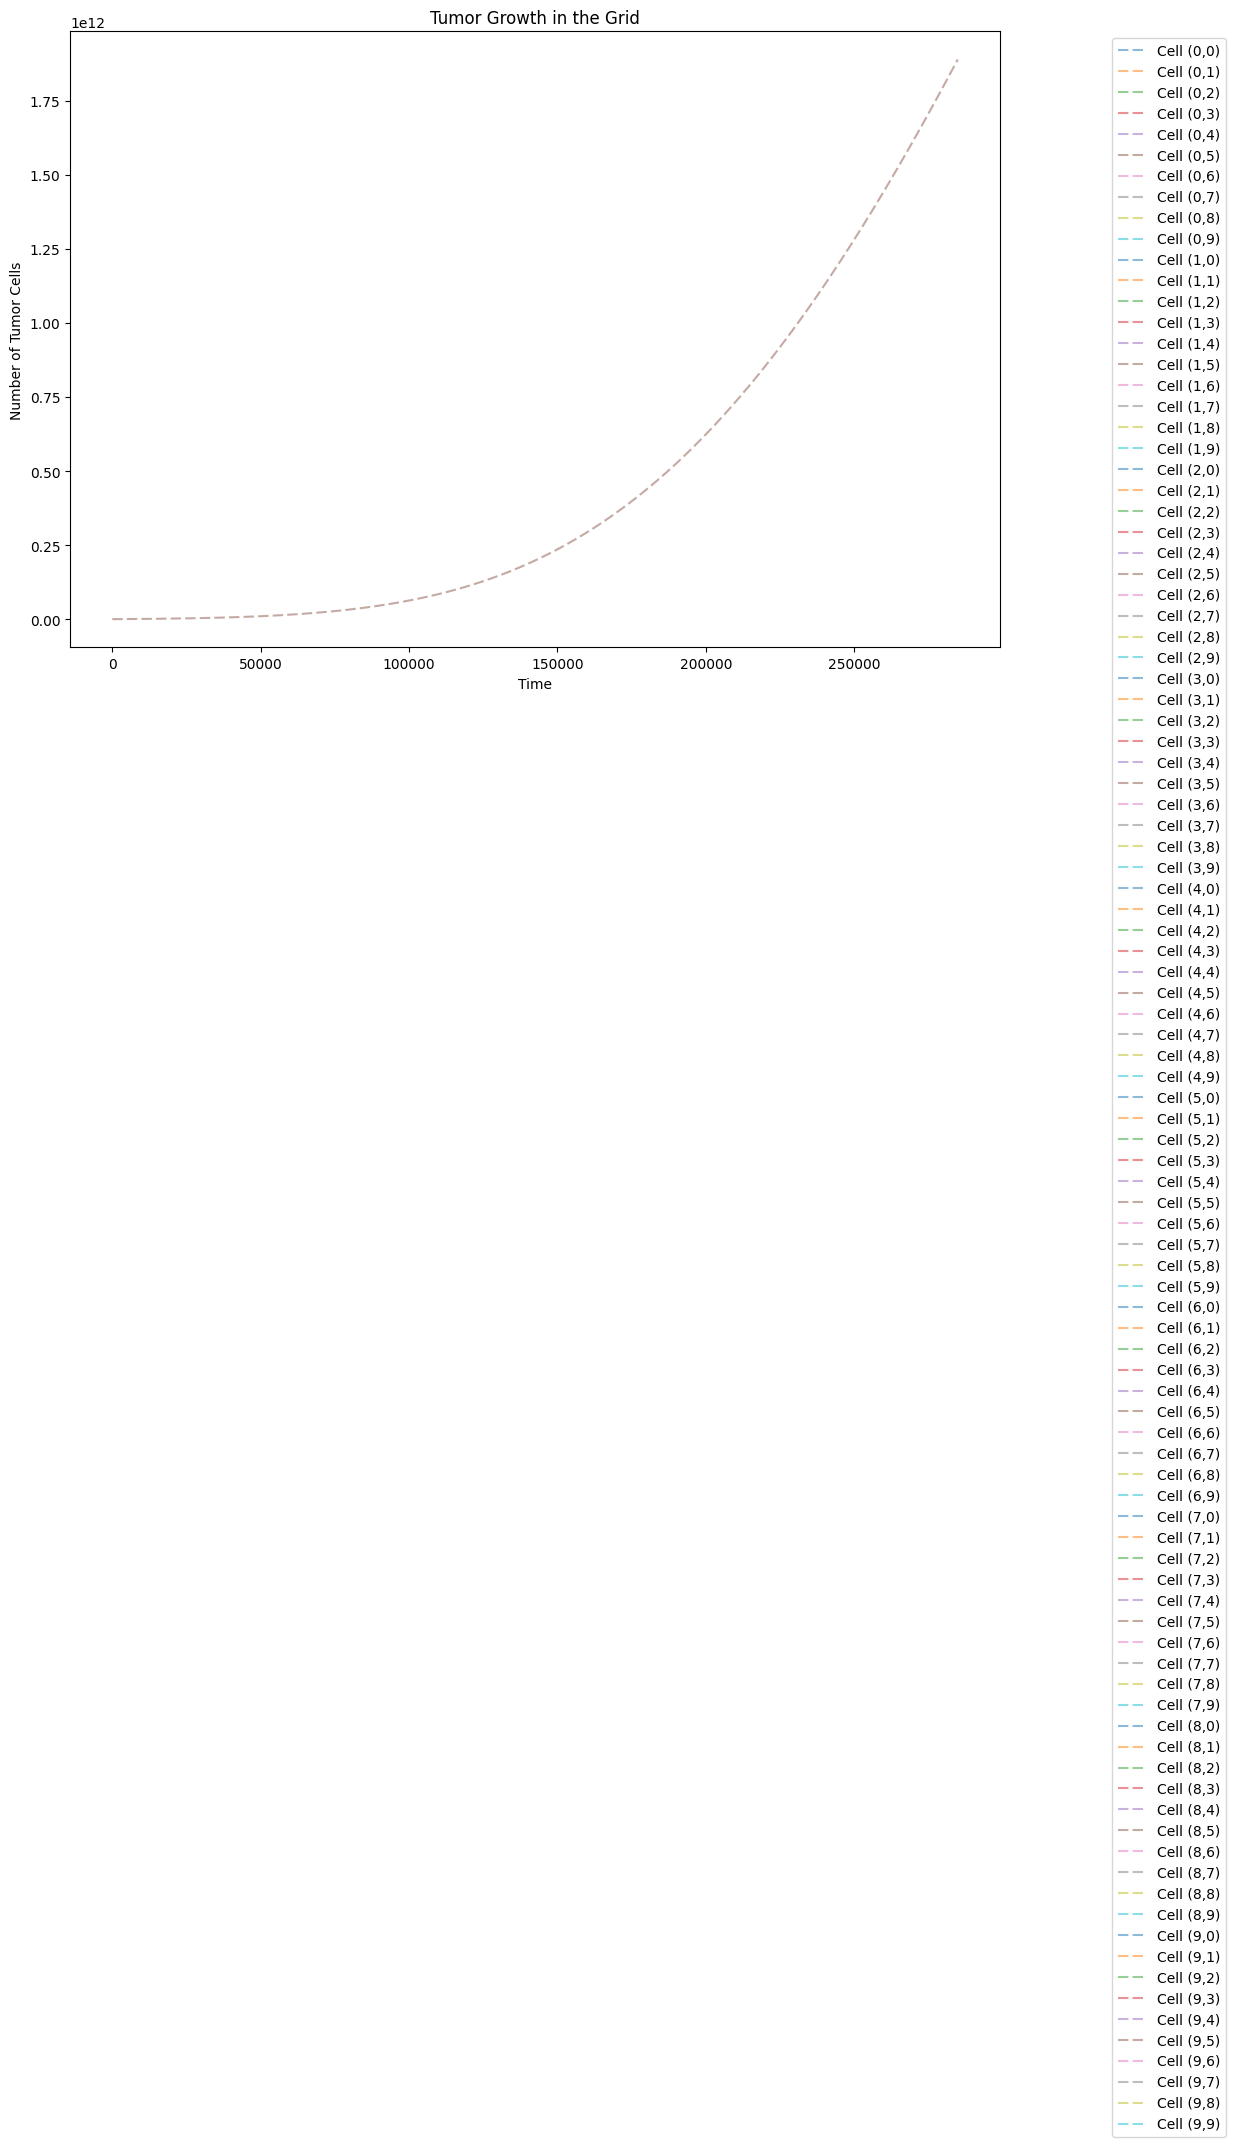

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
k = 0.006  # Growth rate
M = 1e13   # Capacity
N0 = 1e9   # Initial number of cells

# Define grid size
grid_size = 10

# Initialize grid with zeros, representing empty cells
grid = np.zeros((grid_size, grid_size))

# Set initial tumor growth in the center cell
initial_cell = (grid_size // 2, grid_size // 2)
grid[initial_cell] = N0  # Initial number of tumor cells

# Define tumor growth function (Gompertz model)
def tumor_growth(N, k, M, h=0.001):
    if N == 0:
        return 0  # If tumor population is zero, no growth occurs
    else:
        return N + h * k * N * np.log(M / N)

# Define function to simulate tumor growth in a single cell
def simulate_tumor_growth(initial_population, k, M, h=0.001):
    tumor_population = [initial_population]
    while not np.isclose(tumor_population[-1], tumor_growth(tumor_population[-1], k, M), rtol=1e-5):
        tumor_population.append(tumor_growth(tumor_population[-1], k, M))
    return tumor_population

# Define function to simulate tumor growth in the grid
def simulate_grid_tumor_growth(grid, k, M, h=0.001):
    # Initialize list to store tumor growth in each cell
    tumor_growth_grid = np.zeros_like(grid, dtype=object)
    
    # Simulate tumor growth in each cell
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            initial_population = grid[i, j]
            tumor_growth_grid[i, j] = simulate_tumor_growth(initial_population, k, M)
    
    return tumor_growth_grid

# Simulate tumor growth in the grid
tumor_growth_grid = simulate_grid_tumor_growth(grid, k, M)

# Plot tumor growth in the grid
plt.figure(figsize=(12, 8))
for i in range(grid_size):
    for j in range(grid_size):
        plt.plot(tumor_growth_grid[i, j], alpha=0.5, linestyle='--', dashes=(5, 2), label=f'Cell ({i},{j})')

plt.xlabel('Time')
plt.ylabel('Number of Tumor Cells')
plt.title('Tumor Growth in the Grid')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()
